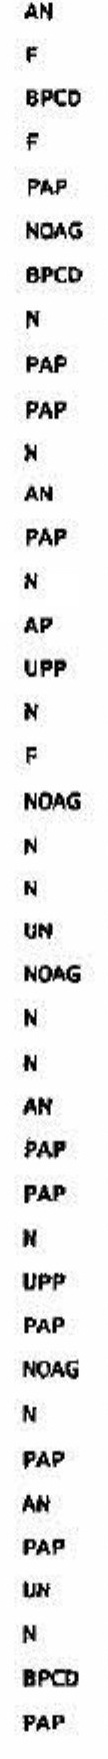

In [1]:
import shutil
import easyocr
import pytesseract
from PIL import Image
from pathlib import Path
from doctr.models import ocr_predictor
from doctr.io import DocumentFile
from paddleocr import PaddleOCR

img_path = './col_grupo_1.jpg'

# Cargar imagen
image = Image.open(img_path)
image

In [2]:
# 1️⃣ Tesseract OCR
print("🔹 Tesseract OCR:")
print(pytesseract.image_to_string(image, lang='spa'))
print("-" * 60)

# 2️⃣ EasyOCR
print("🔹 EasyOCR:")
reader = easyocr.Reader(['es'], gpu=False)
for line in reader.readtext(img_path, detail=1):
    text, score = line[1], line[2]
    print(f"Texto: {text} | Confianza: {score:.2f}")
print("-" * 60)

# 3️⃣ docTR
print("🔹 docTR:")
doc = DocumentFile.from_images(img_path)
model = ocr_predictor(pretrained=True)
result = model(doc)
for block in result.pages[0].blocks:
    for line in block.lines:
        text = " ".join([word.value for word in line.words])
        print(f"Línea: {text}")
print("-" * 60)


# 4️⃣ PaddleOCR
ocr = PaddleOCR(
    det_model_dir="models/det/ppocrv3_det_infer",
    rec_model_dir="models/rec/ppocrv3_rec_infer",
    use_angle_cls=True,
    lang="es",
)

result = ocr.ocr(str(img_path), cls=True)  

for line in result[0]:
    text = line[1][0]
    score = line[1][1]
    print(f"Texto: {text} | Confianza: {score:.2f}")

🔹 Tesseract OCR:


[2025-11-04 16:00:45,910] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


BPCD
PAP
NOAG

BPCO

PAP
PAP

AN
PAP

AP

uPP

NOAG

uN
NOAG

AN

PAP

PAP

did

PAP

PAP

Pap

BPCD
PAP

------------------------------------------------------------
🔹 EasyOCR:
Texto: AN | Confianza: 1.00
Texto: BPcD | Confianza: 0.42
Texto: PAP | Confianza: 0.80
Texto: NQAG | Confianza: 0.57
Texto: BPCD | Confianza: 0.99
Texto: N | Confianza: 1.00
Texto: PAP | Confianza: 0.99
Texto: PAP | Confianza: 1.00
Texto: X | Confianza: 0.79
Texto: AN | Confianza: 0.99
Texto: PAP | Confianza: 0.96
Texto: N | Confianza: 0.68
Texto: AP | Confianza: 0.91
Texto: UPP | Confianza: 0.45
Texto: N | Confianza: 0.96
Texto: F | Confianza: 1.00
Texto: NOAG | Confianza: 0.98
Texto: N | Confianza: 1.00
Texto: N | Confianza: 0.90
Texto: UN | Confianza: 0.64
Texto: NOAG | Confianza: 1.00
Texto: N | Confianza: 0.99
Texto: N | Confianza: 0.99
Texto: AN | Confianza: 0.86
Texto: PAP | Confianza: 0.81
Texto: PAP | Confianza: 0.99
Texto: N | Confianza: 0.12
Texto: UPP | Confianza: 0.48
Texto: PAP | Confianza: 1.00
